<a href="https://colab.research.google.com/github/reddyjai30/jcv/blob/main/CB.EN.U4CSE20027_Jury-FoDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
#we have to sample from a distribution: For this, we use the function proportions_from_distribution
def proportions_from_distribution(table, label, sample_size):
    proportions = np.random.multinomial(sample_size, table.column(label))/sample_size
    return table.with_column('Random Sample', proportions)

In [7]:
#Data are tabulated in a "jury" table below

jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


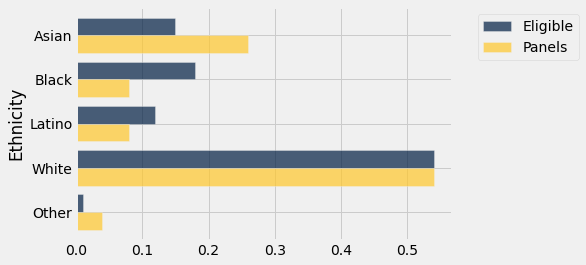

In [8]:
#visualizing overrepresented and some are underrepresented on the jury panels
jury.barh('Ethnicity')

In [9]:
#The total size of all the panels was 1453, so let's 
panel_size = 1453

In [10]:
#assign that number to a name and then call "proportions_from_distribution"
panels_and_sample = proportions_from_distribution(jury, 'Eligible', panel_size)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.149346
Black,0.18,0.08,0.195458
Latino,0.12,0.08,0.129387
White,0.54,0.54,0.512044
Other,0.01,0.04,0.0137646


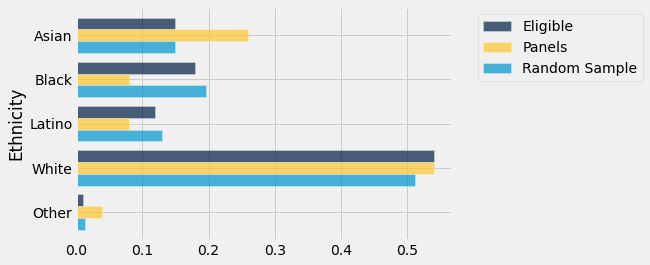

In [11]:
#The grey bars are a lot closer in size to the blue bars than the gold bars are. The random sample 
#resembles the eligible population, but the panels don't.
panels_and_sample.barh('Ethnicity')

In [12]:
#To measure the difference between the two distributions, 
#we will compute a quantity called the total variation distance between them.
#Alter the table with a column of differences between proportions

jury_with_diffs = jury.with_column('Difference', jury.column('Panels') - jury.column('Eligible'))
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [13]:
#Difference and notice that the sum of its entries is 0: 
#the positive entries add up to 0.14, exactly canceling the 
#total of the negative entries which is -0.14.
#To avoid the cancellation, we drop 
#the negative signs and then add all the entries.So we divide the sum by 2.

jury_with_diffs = jury_with_diffs.with_column('Abs. Difference', np.abs(jury_with_diffs.column('Difference')))
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Abs. Difference
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Other,0.01,0.04,0.03,0.03


In [14]:
#This quantity 0.14 is the total variation distance (TVD) between the distribution of ethnicities
jury_with_diffs.column('Abs. Difference').sum()/2

0.14000000000000001

In [15]:
#Functions for Computing Total Variation Distance

def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2

In [16]:
def table_tvd(table, label, other):
    return total_variation_distance(table.column(label), table.column(other))

table_tvd(jury, 'Eligible', 'Panels')

0.14000000000000001

In [17]:
#Distance between the distribution of the eligible population and the random sample.
table_tvd(panels_and_sample, 'Eligible', 'Random Sample')

0.02860977288368895

In [18]:
#How Much Do Random Samples Differ from the Population?
# Compute empirical distribution of TVDs

panel_size = 1453
repetitions = 5000

tvds = make_array()

for i in np.arange(repetitions):
    
    new_sample = proportions_from_distribution(jury, 'Eligible', panel_size)
    tvds = np.append(tvds, table_tvd(new_sample, 'Eligible', 'Random Sample'))

results = Table().with_column('TVD', tvds)
results

TVD
0.00968341
0.0175224
0.03649
0.0113489
0.0155127
0.0116242
0.0256779
0.0202202
0.0110255
0.00942189


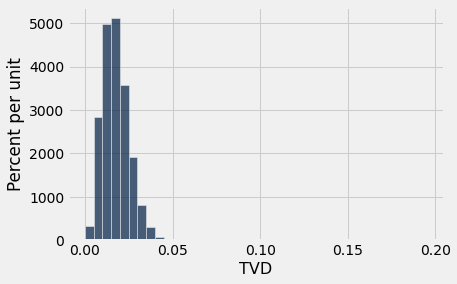

In [19]:
#The histogram of this column shows that drawing 1453 jurors at random from 
#the pool of eligible candidates results in a distribution that rarely deviates 
#from the eligible jurors' race distribution by more than 0.05.

#Observations: Simulations
results.hist(bins=np.arange(0, 0.2, 0.005))

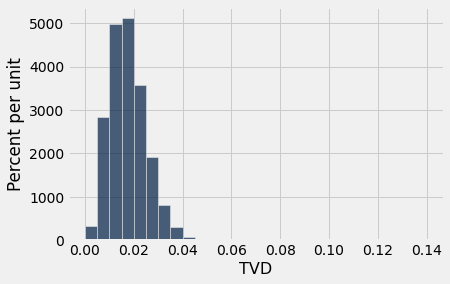

In [32]:
results.hist(bins=np.arange(0, 0.14, 0.005))